# **Aiation Risk Assessment Project**

---



# **Business Problem**

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

The Data
In the data folder is a datasetLinks to an external site. from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

In the cell below we are exporting relevant libraries that will be useful in our analysis

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#ensuring that Matplotlib plots are displayed within the notebook
%matplotlib inline

Opening the csv and excel  files as a dataframes called AviationData_df and Assessment_df respectively.

In [ ]:
#Opening csv file as a dataframe
with open('AviationData.csv', encoding='utf-8', errors='replace') as f:
    AviationData_df = pd.read_csv(f,low_memory=False)
#opening excel file as a dataframe
with open('USState_Codes.csv', encoding='utf-8', errors='replace') as f:
    USState_Codes_df = pd.read_csv(f, low_memory=False)

Displaying the first few rows of the DataFrames to get a quick preview of the top records of your dataset and inspect the structure of the data, such as the column names, types, and values.

In [ ]:
# displaying the first few rows of AviationData_df
AviationData_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
#displaying the first few rows of
USState_Codes_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Let's get a summary information of the DataFrames

In [ ]:
#Displaying the summary information of AviationData_df
AviationData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Inspecting the dataset above, there are several columns that contain missing values. There is also incosistency in data types such as Latitude,Longitude and Number.of.Engines that are of  type object but they should be numerical type(float or int). The Event.Date and Publication.Date are also of type object.These should be converted to datetime to facilitate date-related analyses.

# **Dealing with Missing Values**

For categorical Columns consider filling them with default values(Unknown) or dropping rows and columns with excessive missing columns

For numeric columns imputing them with summary statistics(mean,median,mode)

In [ ]:
#dropping columns with excessive missing columns
#defining columns to drop
columns_to_drop = ['Latitude', 'Longitude', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier', 'Airport.Code','Airport.Name']

# Filter the columns to drop to include only those that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in AviationData_df.columns]

# Drop the specified columns from the DataFrame if they exist
AviationData_df = AviationData_df.drop(columns=columns_to_drop)
AviationData_df.info() #checking if the columns with excessive missing values have been dropped



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Injury.Severity         87889 non-null  object 
 7   Aircraft.damage         85695 non-null  object 
 8   Registration.Number     87507 non-null  object 
 9   Make                    88826 non-null  object 
 10  Model                   88797 non-null  object 
 11  Amateur.Built           88787 non-null  object 
 12  Number.of.Engines       82805 non-null  float64
 13  Engine.Type             81793 non-null  object 
 14  Purpose.of.flight       82697 non-null

In [ ]:
#imputing missing values in Registration Number with Unknown
AviationData_df['Registration.Number'] = AviationData_df['Registration.Number'].fillna('Unknown')


In [ ]:
#filling Nat values in Publication.Date with a specific placeholder (1990-01-01)
AviationData_df['Publication.Date'] = AviationData_df['Publication.Date'].fillna(pd.Timestamp('1990-01-01'))



In [ ]:
# Fill missing values in Report.Status with the most frequent value (mode)
most_frequent_value = AviationData_df['Report.Status'].mode()[0]
AviationData_df['Report.Status'] = AviationData_df['Report.Status'].fillna(most_frequent_value)


In [ ]:
#Filling missing values in Broad.phase.of.flight with a placeholder string  Uknown
AviationData_df['Broad.phase.of.flight']=  AviationData_df['Broad.phase.of.flight'].fillna('Unknown')

In [ ]:
#calculating the median of Total.Minor.Injuries
median_value = AviationData_df['Total.Minor.Injuries'].median()
#Imputing missing  in Total.Minor.Injuries values with median
AviationData_df['Total.Minor.Injuries']=  AviationData_df['Total.Minor.Injuries'].fillna(median_value)


In [ ]:
#calculating the median of Total.Fatal.Injuries
median_value = AviationData_df['Total.Fatal.Injuries'].median()
#Imputing missing values in Total.Fatal.Injuries with median
AviationData_df['Total.Fatal.Injuries']=  AviationData_df['Total.Fatal.Injuries'].fillna(median_value)


In [ ]:
#Filling missing values in Purpose.of.flight with a placeholder string  Uknown
AviationData_df['Purpose.of.flight']=  AviationData_df['Purpose.of.flight'].fillna('Unknown')

In [ ]:
# Fill missing values in Engine.Type with the most frequent value (mode)
most_frequent_value = AviationData_df['Engine.Type'].mode()[0]
AviationData_df['Engine.Type'] = AviationData_df['Engine.Type'].fillna(most_frequent_value)


In [ ]:
#imputing missing values in the Number.of.Engines column with median
#calculating the mean of Number.of.Engines
median_value = AviationData_df['Number.of.Engines'].median()
#Imputing missing values with median
AviationData_df['Number.of.Engines']=  AviationData_df['Number.of.Engines'].fillna(median_value)


In [ ]:
# Fill missing values in Amateur.Built with the most frequent value (mode)
most_frequent_value = AviationData_df['Amateur.Built'].mode()[0]
AviationData_df['Amateur.Built'] = AviationData_df['Amateur.Built'].fillna(most_frequent_value)


In [ ]:
#Filling missing values in Model with a placeholder string  Uknown
AviationData_df['Model']=  AviationData_df['Model'].fillna('Unknown')

In [ ]:
#Filling missing values in Make with a placeholder string  Uknown
AviationData_df['Make']=  AviationData_df['Make'].fillna('Unknown')

In [ ]:
#imputing missing values in the Aircraft.damage column with mode
#calculating the mode of Aircraft.damage
most_frequent_value = AviationData_df['Aircraft.damage'].mode()[0]
AviationData_df['Aircraft.damage'] = AviationData_df['Aircraft.damage'].fillna(most_frequent_value)

In [ ]:
#imputing missing values in the Injury.Severity column with mode
#calculating the mode of Injury.Severity
most_frequent_value = AviationData_df['Injury.Severity'].mode()[0]
AviationData_df['Injury.Severity'] = AviationData_df['Injury.Severity'].fillna(most_frequent_value)

In [ ]:
#Filling missing values with a placeholder string United States
AviationData_df['Country']=  AviationData_df['Country'].fillna('United States')

In [ ]:
#Filling missing values with a placeholder string like Uknown
AviationData_df['Location'] =  AviationData_df['Location'].fillna('Unknown')

In [ ]:
#imputing missing values in the Total.Serious.Injuries column with mean
#calculating the mean of Total.Serious.Injuries
mean_value = AviationData_df['Total.Serious.Injuries'].mean()
#Imputing missing values with median
AviationData_df['Total.Serious.Injuries']=  AviationData_df['Total.Serious.Injuries'].fillna(mean_value)


In [ ]:
#imputing missing values in the Total.Uninjured column with mean
#calculating the mean of Total.Uninjured
mean_value = AviationData_df['Total.Uninjured'].mean()
#Imputing missing values with median
AviationData_df['Total.Uninjured']=  AviationData_df['Total.Uninjured'].fillna(mean_value)


In [ ]:
#imputing missing values in the Weather.Condition column with mode
#calculating the mode of Weather.Condition
most_frequent_value = AviationData_df['Weather.Condition'].mode()[0]
AviationData_df['Weather.Condition'] = AviationData_df['Weather.Condition'].fillna(most_frequent_value)

# **Converting Object Types:**

Convert date columns (Event.Date and Publication.Date) to datetime format:

In [ ]:
#converting date columns to datetime format
AviationData_df['Event.Date'] = pd.to_datetime(AviationData_df['Event.Date'],errors='coerce')
AviationData_df['Publication.Date'] = pd.to_datetime(AviationData_df['Publication.Date'], errors='coerce')


Convert Numeric Columns:

Ensure that numeric columns are in the correct format (if any of them are stored as object):

In [ ]:
# ensuring numeric columns are stored correctly
numeric_columns = ['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
                   'Total.Minor.Injuries', 'Total.Uninjured']
AviationData_df[numeric_columns] = AviationData_df[numeric_columns].apply(pd.to_numeric)

In [ ]:
# Remove leading and trailing whitespaces in the 'Model' column
AviationData_df['Model'] = AviationData_df['Model'].str.rstrip()


In [ ]:
# Convert all values in the 'Location' column to uppercase
AviationData_df['Location'] = AviationData_df['Location'].str.upper()

In [ ]:
# Convert all values in the 'Make' column to uppercase
AviationData_df['Make'] = AviationData_df['Make'].str.upper()

In [ ]:
# Convert all object columns to uppercase
AviationData_df.loc[:, AviationData_df.select_dtypes(include='object').columns] = AviationData_df.select_dtypes(include='object').apply(lambda x: x.str.upper())


Split the location column to have city and State Code

In [ ]:
# Ensure the 'Location' column is treated as a string and handle missing values
AviationData_df['Location'] = AviationData_df['Location'].astype(str)

# Split the 'Location' column into 'City' and 'State Code', filling NaN with empty strings
AviationData_df[['City', 'State Code']] = AviationData_df['Location'].str.split(',', expand=True, n=1).fillna('')

# Remove any leading or trailing whitespace from the new columns
AviationData_df['City'] = AviationData_df['City'].str.strip()
AviationData_df['State Code'] = AviationData_df['State Code'].str.strip()
print(AviationData_df[['Location', 'City', 'State Code']].head())

          Location         City State Code
0  MOOSE CREEK, ID  MOOSE CREEK         ID
1   BRIDGEPORT, CA   BRIDGEPORT         CA
2    SALTVILLE, VA    SALTVILLE         VA
3       EUREKA, CA       EUREKA         CA
4       CANTON, OH       CANTON         OH


In [ ]:
# Drop the 'Location' column
AviationData_df = AviationData_df.drop(columns=['Location'])

In [ ]:
AviationData_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries,Year,City,State Code
0,20001218X45444,ACCIDENT,SEA87LA080,1948-10-24,UNITED STATES,FATAL(2),DESTROYED,NC6404,STINSON,108-3,...,0.0,0.00000,UNK,CRUISE,PROBABLE CAUSE,1990-01-01,2.000000,1948,MOOSE CREEK,ID
1,20001218X45447,ACCIDENT,LAX94LA336,1962-07-19,UNITED STATES,FATAL(4),DESTROYED,N5069P,PIPER,PA24-180,...,0.0,0.00000,UNK,UNKNOWN,PROBABLE CAUSE,1996-09-19,4.000000,1962,BRIDGEPORT,CA
2,20061025X01555,ACCIDENT,NYC07LA005,1974-08-30,UNITED STATES,FATAL(3),DESTROYED,N5142R,CESSNA,172M,...,0.0,5.32544,IMC,CRUISE,PROBABLE CAUSE,2007-02-26,3.279881,1974,SALTVILLE,VA
3,20001218X45448,ACCIDENT,LAX96LA321,1977-06-19,UNITED STATES,FATAL(2),DESTROYED,N1168J,ROCKWELL,112,...,0.0,0.00000,IMC,CRUISE,PROBABLE CAUSE,2000-12-09,2.000000,1977,EUREKA,CA
4,20041105X01764,ACCIDENT,CHI79FA064,1979-08-02,UNITED STATES,FATAL(1),DESTROYED,N15NY,CESSNA,501,...,0.0,0.00000,VMC,APPROACH,PROBABLE CAUSE,1980-04-16,3.000000,1979,CANTON,OH


Let's check if there are any duplicates in AviationData_df

In [ ]:
#checking if there are duplicates
AviationData_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
88884,False
88885,False
88886,False
88887,False


Rename the Abbreviation column in the USStates_Code_df to be State Code

In [ ]:
# Rename the 'Abbreviation' column to 'State Code'
USState_Codes_df = USState_Codes_df.rename(columns={'Abbreviation': 'State Code'})

# Display the first few rows to confirm the change
print(USState_Codes_df.head())

     US_State State Code
0     Alabama         AL
1      Alaska         AK
2     Arizona         AZ
3    Arkansas         AR
4  California         CA


Since there are no duplicates and our DataFrame is clean we can proceed to Visualization.

# **Visualization**

# Key Considerations:
To determine which aircraft are the lowest risk based on the dataset and present actionable insights, here are some visualizations  to highlight risk factors and trends:


# **Total Fatal Injuries vs. Number of Engines**

Visualization: A scatter plot showing the relationship between the number of engines and total fatal injuries

Purpose: Explore whether the number of engines correlates with the number of fatal injuries.


<Axes: xlabel='Number.of.Engines', ylabel='Total.Fatal.Injuries'>

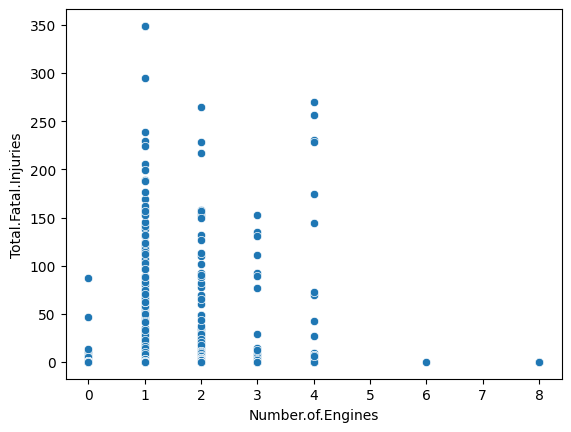

In [ ]:
#plotting a scatter plot using seaborn
sns.scatterplot(x='Number.of.Engines', y='Total.Fatal.Injuries', data=AviationData_df)

In [ ]:
"""Aircraft with fewer engines  appear to be associated with a higher number of fatal injuries compared to those with 5 engines and above. This suggests that those with  4 engines and below aircraft might present a greater risk in the event of an accident. For the company’s expansion into aviation, investing in aircrafts with 5 engines and above could be a safer option, as they may offer greater reliability and safety in emergency situations.
"""

'Aircraft with fewer engines  appear to be associated with a higher number of fatal injuries compared to those with 5 engines and above. This suggests that those with  4 engines and below aircraft might present a greater risk in the event of an accident. For the company’s expansion into aviation, investing in aircrafts with 5 engines and above could be a safer option, as they may offer greater reliability and safety in emergency situations.\n'

# **Total Injuries by Purpose of Flight**

Visualization:A bar chart comparing the number of total injuries by the purpose of flight

Purpose: Compare the distribution of total injuries (Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries) across different purposes of flight (commercial, private, etc.).

Insight: Reveals whether private or commercial operations are associated with greater risk.


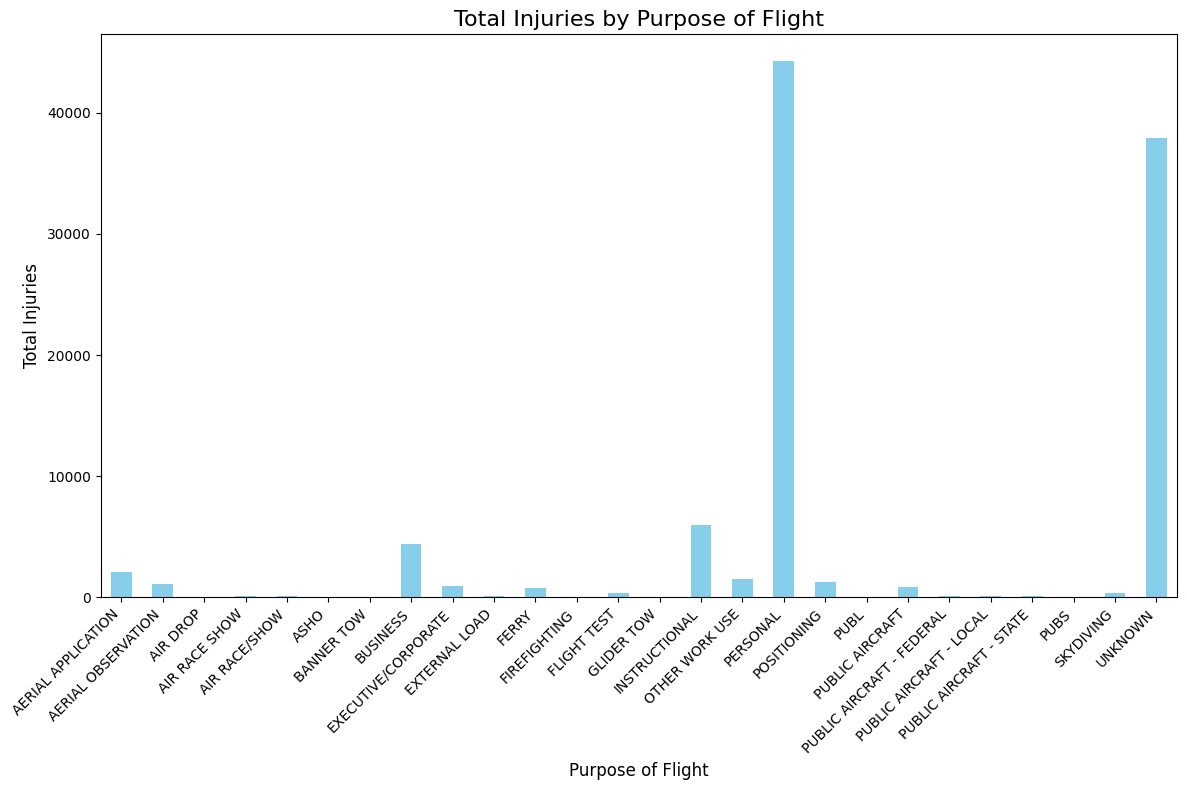

In [ ]:
 #creating new column for total injuries by summing fatal, serious, and minor injuries
AviationData_df['Total.Injuries'] = (AviationData_df['Total.Fatal.Injuries'].fillna(0) +
                                     AviationData_df['Total.Serious.Injuries'].fillna(0) +
                                     AviationData_df['Total.Minor.Injuries'].fillna(0))

# Group the data by 'Purpose.of.flight' and sum the total injuries
injuries_by_flight_purpose = AviationData_df.groupby('Purpose.of.flight')['Total.Injuries'].sum()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot the bar chart
injuries_by_flight_purpose.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Total Injuries by Purpose of Flight', fontsize=16)
plt.xlabel('Purpose of Flight', fontsize=12)
plt.ylabel('Total Injuries', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
"""
Personal flights account for the majority of incidents, suggesting they may carry a higher risk compared to other flight purposes. This could be due to factors such as less stringent regulations, pilot experience, or operational conditions. The company should consider implementing stricter safety protocols or additional training for pilots involved in personal flights to mitigate this risk."
"""

'\nPersonal flights account for the majority of incidents, suggesting they may carry a higher risk compared to other flight purposes. This could be due to factors such as less stringent regulations, pilot experience, or operational conditions. The company should consider implementing stricter safety protocols or additional training for pilots involved in personal flights to mitigate this risk."\n'

# **Broad Phase of Flight at Time of Accident**

Visualization: A bar chart displaying the phase of flight  when accidents occurred.

Purpose: Identify the most risky phases of flight.

Summary Statistics: Count of incidents by phase of flight.


<Axes: title={'center': 'Incidents by Phase of Flight'}, xlabel='Broad.phase.of.flight'>

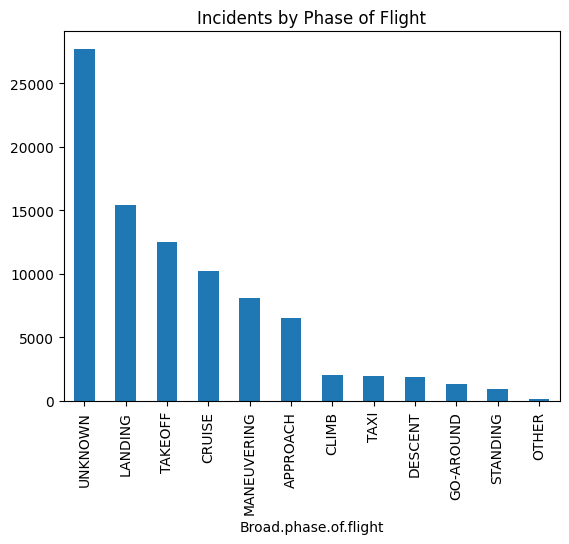

In [ ]:
#plotting a bar graph using matplotlib.pyplot
AviationData_df['Broad.phase.of.flight'].value_counts().plot(kind='bar', title='Incidents by Phase of Flight')


In [ ]:
"""The significant number of incidents classified under the unknown' broad phase of flight highlights a critical gap in data reporting and analysis. This suggests that when incidents occur without clear documentation of the flight phase, it complicates understanding the underlying causes and patterns. For effective risk management and safety improvements, the company should prioritize enhancing data collection and reporting practices, ensuring that all incidents are accurately categorized. This could lead to better insights into safety protocols and potentially reduce future incidents.
"""

"The significant number of incidents classified under the 'unknown' broad phase of flight highlights a critical gap in data reporting and analysis. This suggests that when incidents occur without clear documentation of the flight phase, it complicates understanding the underlying causes and patterns. For effective risk management and safety improvements, the company should prioritize enhancing data collection and reporting practices, ensuring that all incidents are accurately categorized. This could lead to better insights into safety protocols and potentially reduce future incidents.\n"

# **Risk by Weather Condition**
Visualization: A bar chart showing the proportion of accidents occurring under different weather conditions

Purpose: Understand how weather affects aircraft risk.

Summary Statistics: Count of incidents by weather condition.


<Axes: title={'center': 'Incidents by Weather Condition'}, xlabel='Weather.Condition'>

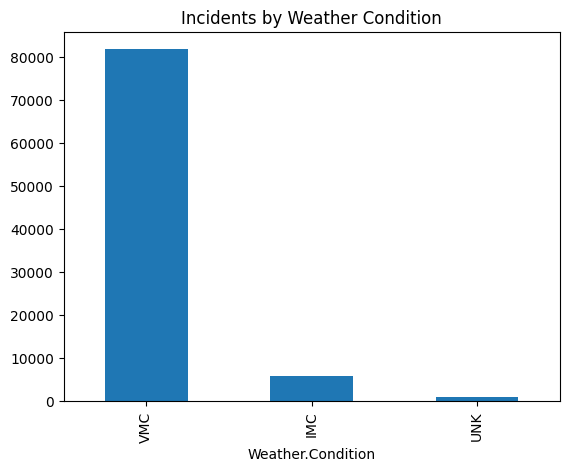

In [ ]:
#plotting a bar chart using matplotlib.pyplot
AviationData_df['Weather.Condition'].value_counts().plot(kind='bar', title='Incidents by Weather Condition')

In [ ]:
"""
The analysis of incidents by weather condition indicates that  weather conditions such as VMC, correlates with a higher incidence of aircraft accidents. This finding underscores the importance of incorporating weather-related risk assessments into operational planning and decision-making. For the company, it may be prudent to establish stricter guidelines for flight operations during adverse weather conditions and ensure pilots receive adequate training to handle flights in challenging weather. Additionally, enhancing pre-flight weather checks and implementing go/no-go decision criteria based on weather conditions could further mitigate risks.
"""

'The analysis of incidents by weather condition indicates that  weather conditions such as VMC, correlates with a higher incidence of aircraft accidents. This finding underscores the importance of incorporating weather-related risk assessments into operational planning and decision-making. For the company, it may be prudent to establish stricter guidelines for flight operations during adverse weather conditions and ensure pilots receive adequate training to handle flights in challenging weather. Additionally, enhancing pre-flight weather checks and implementing go/no-go decision criteria based on weather conditions could further mitigate risks.\n'

# **Frequency of Aircraft Incidents by Make**
Visualization: A pie chart showing the number of incidents per aircraft make.

Purpose: Identify which aircraft models have been involved in the most incidents.

Summary Statistics: Count of incidents by aircraft make and model.


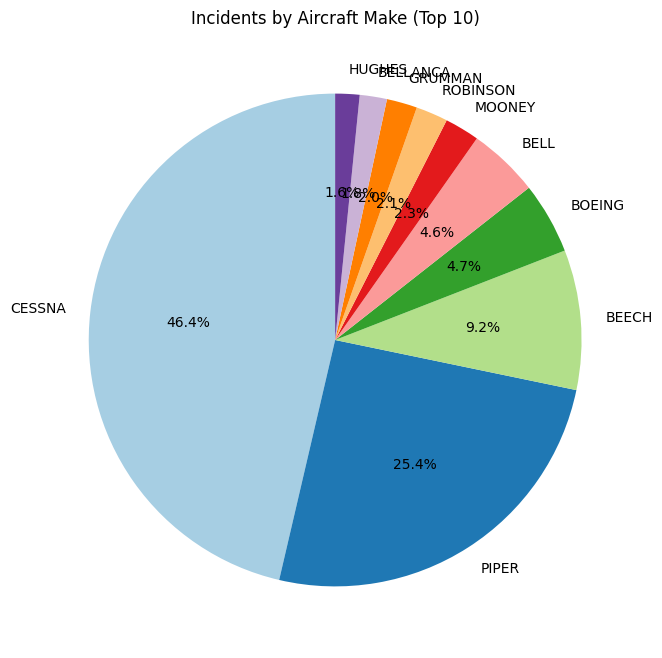

In [ ]:
# Get the counts for each aircraft make
make_counts = AviationData_df['Make'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(make_counts[:10], labels=make_counts.index[:10], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Incidents by Aircraft Make (Top 10)')
plt.show()

In [ ]:
"""
The analysis of incidents by aircraft make reveals that these top 10 specific manufacturers have a higher frequency of incidents compared to others. This could indicate potential concerns regarding the safety records or reliability of those particular aircraft models. For the company’s strategic decision-making in aircraft acquisition, it would be beneficial to conduct a thorough evaluation of the safety performance and incident history of different makes. Prioritizing aircraft from manufacturers with a proven safety track record may enhance operational safety and reduce liability risks associated with purchasing and operating aircraft
"""

'The analysis of incidents by aircraft make reveals that these top 10 specific manufacturers have a higher frequency of incidents compared to others. This could indicate potential concerns regarding the safety records or reliability of those particular aircraft models. For the company’s strategic decision-making in aircraft acquisition, it would be beneficial to conduct a thorough evaluation of the safety performance and incident history of different makes. Prioritizing aircraft from manufacturers with a proven safety track record may enhance operational safety and reduce liability risks associated with purchasing and operating aircraft\n'

# **Time Series of Aircraft Incidents**
Visualization: A line graph showing the number of incidents over time (using the Event.Date).

Purpose: Determine if incidents have been increasing or decreasing over time.

Summary Statistics: Yearly  count of incidents.


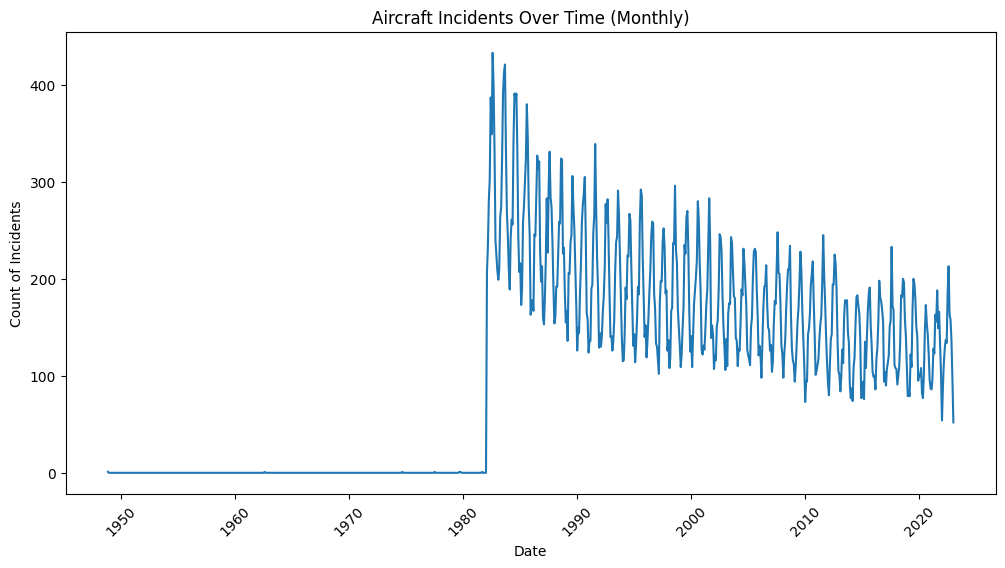

In [ ]:
# Ensure 'Event.Date' is in datetime format
AviationData_df['Event.Date'] = pd.to_datetime(AviationData_df['Event.Date'], errors='coerce')

# Group data by the date (you can group by year, month, etc.)
incident_counts = AviationData_df.resample('M', on='Event.Date').size()  # 'M' means resample by month

# Plot the time series using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_counts.index, y=incident_counts.values)

# Customize the plot
plt.title('Aircraft Incidents Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Count of Incidents')
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
"""In the year  1980 going forward there was a general upward trend in incidents, it could suggest growing risks in aviation safety, warranting further investigation into operational practices, pilot training, and aircraft maintenance standards. Conversely,the trend went downwards in the latter years  indicating there might have been improvements in safety protocols and operational efficiencies.

Understanding these temporal dynamics can guide strategic decision-making for the company's expansion into aviation. It emphasizes the importance of proactive risk management strategies and the need for ongoing monitoring of incident trends to enhance safety and operational reliability."
"""

'In the year  1980 going forward there was a general upward trend in incidents, it could suggest growing risks in aviation safety, warranting further investigation into operational practices, pilot training, and aircraft maintenance standards. Conversely,the trend went downwards in the latter years  indicating there might have been improvements in safety protocols and operational efficiencies.\n\nUnderstanding these temporal dynamics can guide strategic decision-making for the company\'s expansion into aviation. It emphasizes the importance of proactive risk management strategies and the need for ongoing monitoring of incident trends to enhance safety and operational reliability."\n'

In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
AviationData_df.to_csv('/content/drive/My Drive/df.csv', index=False)